In [16]:
import numpy as np
import matplotlib.pyplot as plt


def poly_fit(points):
    X = np.zeros((len(points), 2))
    Y = np.zeros((len(points), 1))

    for i, point in enumerate(points):
        X[i, :] = [point[0], 1]
        Y[i] = point[1]

    coefs = np.linalg.inv(X.T @ X) @ X.T @ Y

    return coefs


def predict(x, coefs):
    return coefs[0] * x + coefs[1]


def f(x, points):
    for i in range(len(points) - 1):
        p1 = points[i]
        p2 = points[i + 1]
        x_range = (p1[0], p2[0])
        if x >= x_range[0] and x <= x_range[1]:
            coefs = poly_fit([p1, p2])
            return predict(x, coefs)


def prolog_degree_curve(fun_name: str, points):
    # Preformatted string
    prolog_format_domain: str = "domain({}, {})."
    prolog_format_first: str = "{}(X, Y) :- X < {}, !, fail."
    prolog_format: str = "{}(X, Y) :- X =< {}, !, max_list([0.0, {:.2f} * X + {:.2f}], Y0), min_list([1.0, Y0], Y)."
    prolog_format_last: str = "{}(X, Y) :- fail."

    print("The piecewise linear function f(X, Y) is defined as follows:")
    for i in range(len(points) - 1):
        # Computation
        p1 = points[i]
        p2 = points[i + 1]
        x_range = (p1[0], p2[0])
        coefs = poly_fit([p1, p2])

        # Display the results
        if i == 0:
            base = fun_name.split('_')[1]
            print(prolog_format_domain.format(points[0][0], points[-1][0]))
            print(prolog_format_first.format(
                fun_name, x_range[0], coefs[0].item(), coefs[1].item()))
        print(prolog_format.format(
            fun_name, x_range[1], coefs[0].item(), coefs[1].item()))
        if i == len(points) - 2:
            print(prolog_format_last.format(
                fun_name, coefs[0].item(), coefs[1].item()))


def plot_degree_curve(fun_name, points):
    x = np.linspace(min([x for x, _ in points]),
                    max([x for x, _ in points]), num=100)
    y = [f(xi, points) for xi in x]
    y = [0 if e is None else e.item() for e in y]
    plt.plot(x, y, color='black')
    plt.title(fun_name)
    plt.show()


def plot_and_code(fun_name: str, points):
    plot_degree_curve(fun_name, points)
    prolog_degree_curve(fun_name, points)


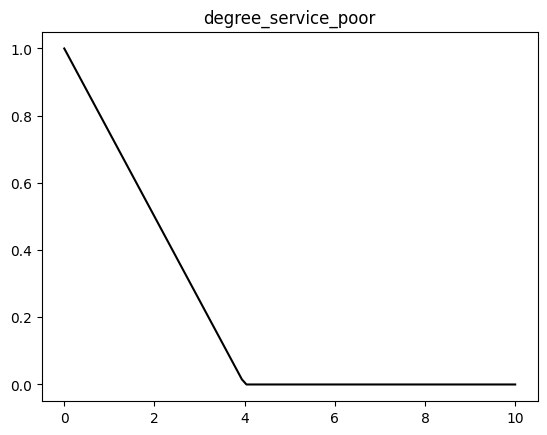

The piecewise linear function f(X, Y) is defined as follows:
domain(0, 10).
degree_service_poor(X, Y) :- X < 0, !, fail.
degree_service_poor(X, Y) :- X =< 4, !, max_list([0.0, -0.25 * X + 1.00], Y0), min_list([1.0, Y0], Y).
degree_service_poor(X, Y) :- X =< 10, !, max_list([0.0, 0.00 * X + 0.00], Y0), min_list([1.0, Y0], Y).
degree_service_poor(X, Y) :- fail.


In [17]:
plot_and_code('degree_service_poor', [(0, 1), (4, 0), (10, 0)])

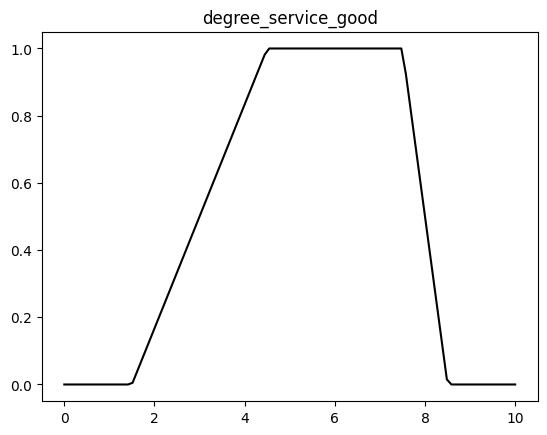

The piecewise linear function f(X, Y) is defined as follows:
domain(0, 10).
degree_service_good(X, Y) :- X < 0, !, fail.
degree_service_good(X, Y) :- X =< 1.5, !, max_list([0.0, 0.00 * X + 0.00], Y0), min_list([1.0, Y0], Y).
degree_service_good(X, Y) :- X =< 4.5, !, max_list([0.0, 0.33 * X + -0.50], Y0), min_list([1.0, Y0], Y).
degree_service_good(X, Y) :- X =< 7.5, !, max_list([0.0, 0.00 * X + 1.00], Y0), min_list([1.0, Y0], Y).
degree_service_good(X, Y) :- X =< 8.5, !, max_list([0.0, -1.00 * X + 8.50], Y0), min_list([1.0, Y0], Y).
degree_service_good(X, Y) :- X =< 10, !, max_list([0.0, 0.00 * X + 0.00], Y0), min_list([1.0, Y0], Y).
degree_service_good(X, Y) :- fail.


In [18]:
plot_and_code('degree_service_good', [(0, 0), (1.5, 0), (4.5, 1), (7.5, 1), (8.5, 0), (10, 0)])

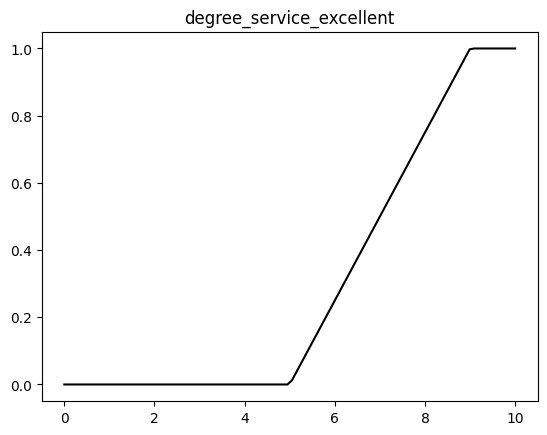

The piecewise linear function f(X, Y) is defined as follows:
domain(0, 10).
degree_service_excellent(X, Y) :- X < 0, !, fail.
degree_service_excellent(X, Y) :- X =< 5, !, max_list([0.0, 0.00 * X + 0.00], Y0), min_list([1.0, Y0], Y).
degree_service_excellent(X, Y) :- X =< 9, !, max_list([0.0, 0.25 * X + -1.25], Y0), min_list([1.0, Y0], Y).
degree_service_excellent(X, Y) :- X =< 10, !, max_list([0.0, 0.00 * X + 1.00], Y0), min_list([1.0, Y0], Y).
degree_service_excellent(X, Y) :- fail.


In [19]:
plot_and_code('degree_service_excellent', [(0, 0), (5, 0), (9, 1), (10, 1)])

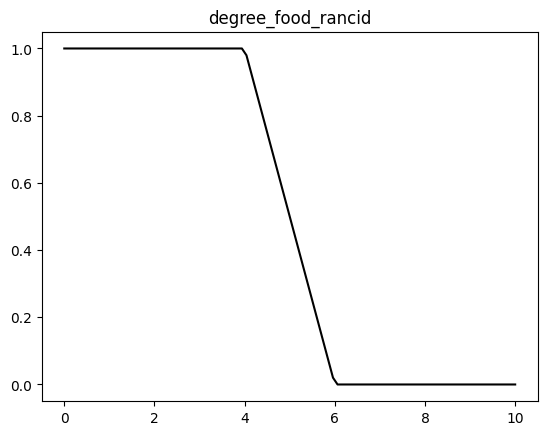

The piecewise linear function f(X, Y) is defined as follows:
domain(0, 10).
degree_food_rancid(X, Y) :- X < 0, !, fail.
degree_food_rancid(X, Y) :- X =< 4, !, max_list([0.0, 0.00 * X + 1.00], Y0), min_list([1.0, Y0], Y).
degree_food_rancid(X, Y) :- X =< 6, !, max_list([0.0, -0.50 * X + 3.00], Y0), min_list([1.0, Y0], Y).
degree_food_rancid(X, Y) :- X =< 10, !, max_list([0.0, 0.00 * X + 0.00], Y0), min_list([1.0, Y0], Y).
degree_food_rancid(X, Y) :- fail.


In [20]:
plot_and_code('degree_food_rancid', [(0, 1), (4, 1), (6, 0), (10, 0)])

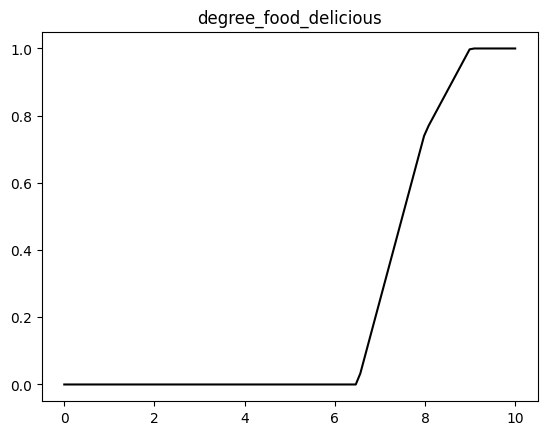

The piecewise linear function f(X, Y) is defined as follows:
domain(0, 10).
degree_food_delicious(X, Y) :- X < 0, !, fail.
degree_food_delicious(X, Y) :- X =< 6.5, !, max_list([0.0, 0.00 * X + 0.00], Y0), min_list([1.0, Y0], Y).
degree_food_delicious(X, Y) :- X =< 8, !, max_list([0.0, 0.50 * X + -3.25], Y0), min_list([1.0, Y0], Y).
degree_food_delicious(X, Y) :- X =< 9, !, max_list([0.0, 0.25 * X + -1.25], Y0), min_list([1.0, Y0], Y).
degree_food_delicious(X, Y) :- X =< 10, !, max_list([0.0, 0.00 * X + 1.00], Y0), min_list([1.0, Y0], Y).
degree_food_delicious(X, Y) :- fail.


In [21]:
plot_and_code('degree_food_delicious', [(0, 0), (6.5, 0), (8, 0.75), (9, 1), (10, 1)])

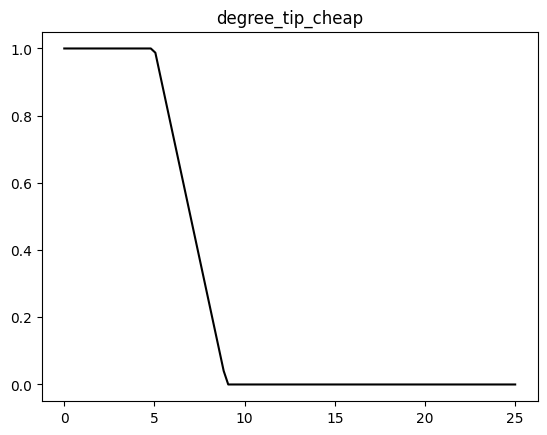

The piecewise linear function f(X, Y) is defined as follows:
domain(0, 25).
degree_tip_cheap(X, Y) :- X < 0, !, fail.
degree_tip_cheap(X, Y) :- X =< 5, !, max_list([0.0, 0.00 * X + 1.00], Y0), min_list([1.0, Y0], Y).
degree_tip_cheap(X, Y) :- X =< 9, !, max_list([0.0, -0.25 * X + 2.25], Y0), min_list([1.0, Y0], Y).
degree_tip_cheap(X, Y) :- X =< 25, !, max_list([0.0, 0.00 * X + 0.00], Y0), min_list([1.0, Y0], Y).
degree_tip_cheap(X, Y) :- fail.


In [22]:
plot_and_code('degree_tip_cheap', [(0, 1), (5, 1), (9, 0), (25, 0)])

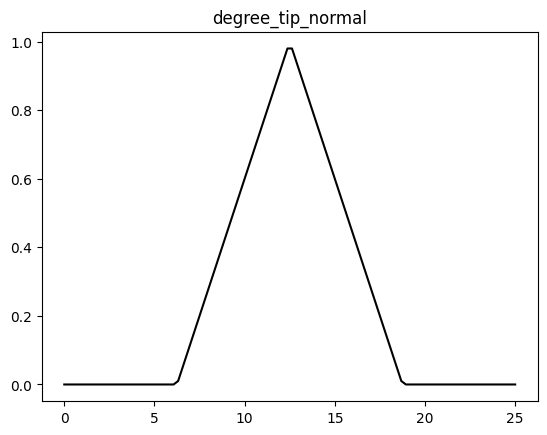

The piecewise linear function f(X, Y) is defined as follows:
domain(0, 25).
degree_tip_normal(X, Y) :- X < 0, !, fail.
degree_tip_normal(X, Y) :- X =< 6.25, !, max_list([0.0, 0.00 * X + 0.00], Y0), min_list([1.0, Y0], Y).
degree_tip_normal(X, Y) :- X =< 12.5, !, max_list([0.0, 0.16 * X + -1.00], Y0), min_list([1.0, Y0], Y).
degree_tip_normal(X, Y) :- X =< 18.75, !, max_list([0.0, -0.16 * X + 3.00], Y0), min_list([1.0, Y0], Y).
degree_tip_normal(X, Y) :- X =< 25, !, max_list([0.0, 0.00 * X + 0.00], Y0), min_list([1.0, Y0], Y).
degree_tip_normal(X, Y) :- fail.


In [23]:
plot_and_code('degree_tip_normal', [(0, 0), (6.25, 0), (12.5, 1), (18.75, 0), (25, 0)])

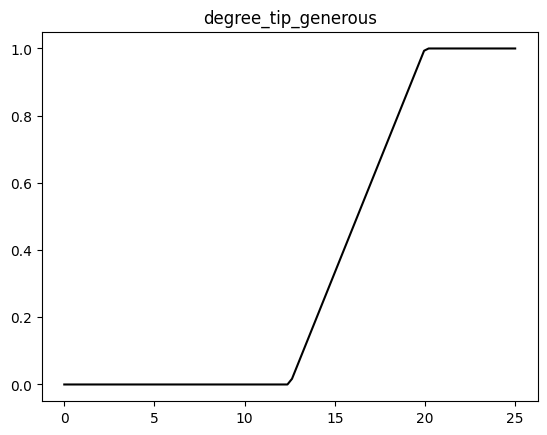

The piecewise linear function f(X, Y) is defined as follows:
domain(0, 25).
degree_tip_generous(X, Y) :- X < 0, !, fail.
degree_tip_generous(X, Y) :- X =< 12.5, !, max_list([0.0, 0.00 * X + 0.00], Y0), min_list([1.0, Y0], Y).
degree_tip_generous(X, Y) :- X =< 20, !, max_list([0.0, 0.13 * X + -1.67], Y0), min_list([1.0, Y0], Y).
degree_tip_generous(X, Y) :- X =< 25, !, max_list([0.0, 0.00 * X + 1.00], Y0), min_list([1.0, Y0], Y).
degree_tip_generous(X, Y) :- fail.


In [24]:
plot_and_code('degree_tip_generous', [(0, 0), (12.5, 0), (20, 1), (25, 1)])